In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Preproccessing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
column_data_types = df.dtypes

numerical_count = 0
categorical_count = 0
for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"{numerical_count} Columns are Numerical")
print(f"{categorical_count} Columns are Categorical")

26 Columns are Numerical
9 Columns are Categorical


In [7]:
df.select_dtypes(np.number).sample(5)

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
348    42        810                23          5              1   
1120   38        437                16          3              1   
418    26       1349                23          3              1   
149    19       1181                 3          1              1   
1137   22        457                26          2              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
348              468                        1          44               3   
1120            1583                        2          90               3   
418              560                        1          90               3   
149              201                        2          79               3   
1137            1605                        2          85               2   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
348          4  ...                         2             80   
1120         2  ...                         2             80   
418          1  ...                         2             80   
149          1  ...                         4             80   
1137         1  ...                         2             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
348                  0                 16                      2   
1120                 0                  8                      5   
418                  2                  3                      3   
149                  0                  1                      3   
1137                 0                  4                      2   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
348                 3               1                   0   
1120                4               3                   2   
418                 1               3                   2   
149                 3               1                   0   
1137                2               4                   2   

      YearsSinceLastPromotion  YearsWithCurrManager  
348                         0                     0  
1120                        1                     2  
418                         0                     2  
149                         0                     0  
1137                        1                     3  

[5 rows x 26 columns]

In [8]:
df.select_dtypes(include='O').sample(5)

Attrition BusinessTravel              Department EducationField  Gender  \
628        No  Travel_Rarely                   Sales      Marketing    Male   
736        No  Travel_Rarely  Research & Development  Life Sciences    Male   
871       Yes  Travel_Rarely  Research & Development  Life Sciences  Female   
399        No  Travel_Rarely  Research & Development  Life Sciences    Male   
562       Yes  Travel_Rarely  Research & Development          Other    Male   

                       JobRole MaritalStatus Over18 OverTime  
628            Sales Executive      Divorced      Y       No  
736  Healthcare Representative        Single      Y       No  
871      Laboratory Technician       Married      Y       No  
399      Laboratory Technician       Married      Y       No  
562         Research Scientist        Single      Y      Yes

In [9]:
#check if there are duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
#The data is highly imbalanced
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# drop columns that has no meaning in our analysis and prediction
cols = ["EmployeeCount", "EmployeeNumber"]
df.drop(columns=cols, inplace=True)

In [12]:
df.describe(include="O").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [13]:
#from the above cell we can notice that all the employees are above 18 so we will drop this column
df.drop( columns = ['Over18'], inplace=True)

In [14]:
df['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [15]:
#from the above cell we can notice that all the StandardHours are 80 so we will also drop it
df.drop( columns = ['StandardHours'], inplace=True)

## Cat Columns Analysis

In [16]:
num_cols = df.select_dtypes(np.number).columns
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/3331673929.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})


In [17]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

f_scores = {}
p_values = {}

for column in num_cols:
    f_score, p_value = stats.f_oneway(new_data[column],new_data["Attrition"])
    f_scores[column] = f_score
    p_values[column] = p_value

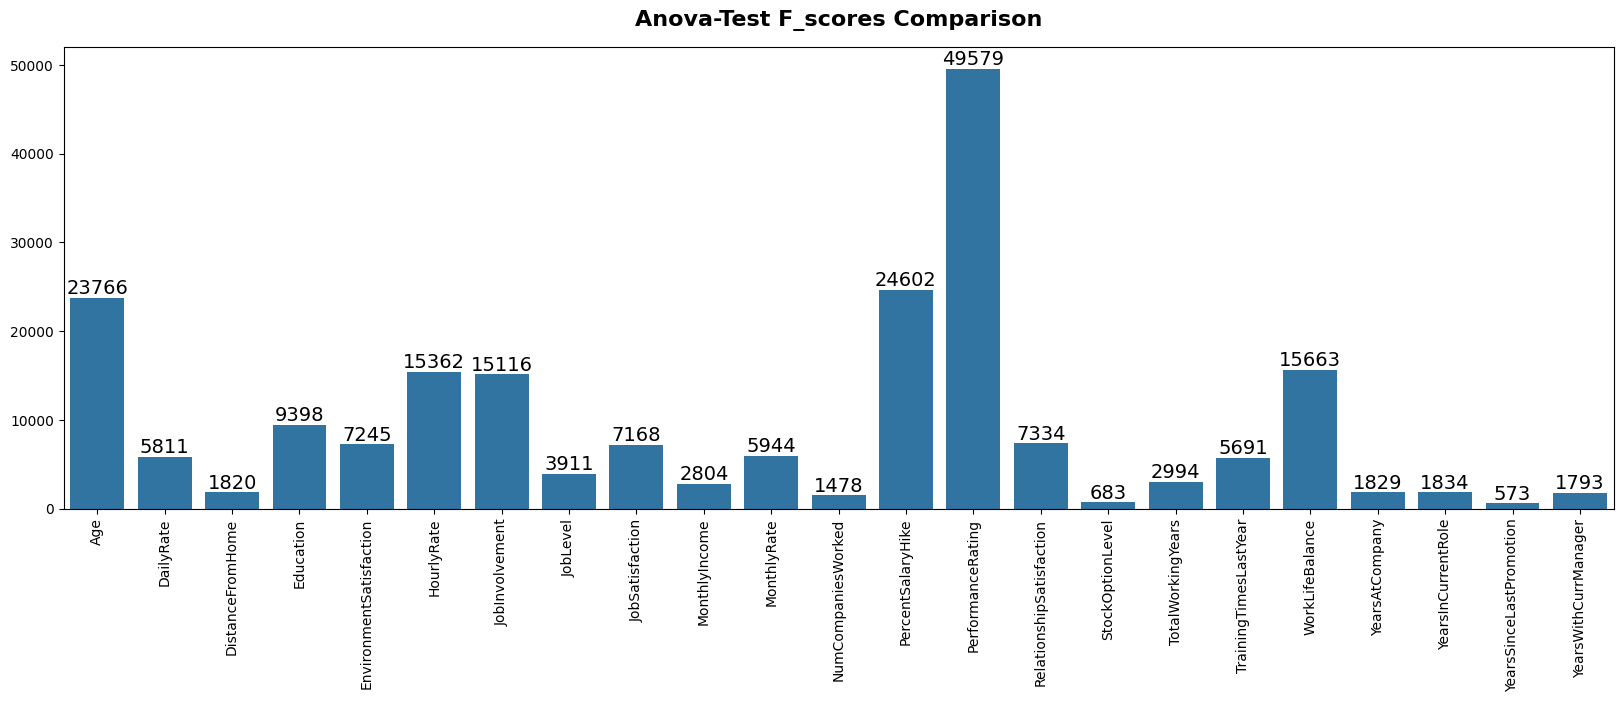

In [18]:
plt.figure(figsize=(20,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova-Test F_scores Comparison", fontweight="black", size=16, pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom", size=14)
plt.show()

In [19]:
# perform chis square test to analyze categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("Attrition")

In [20]:
chi2_statistic = {}
p_values = {}

# Perform chi-square test for each column
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_statistic[col] = chi2
    p_values[col] = p_value

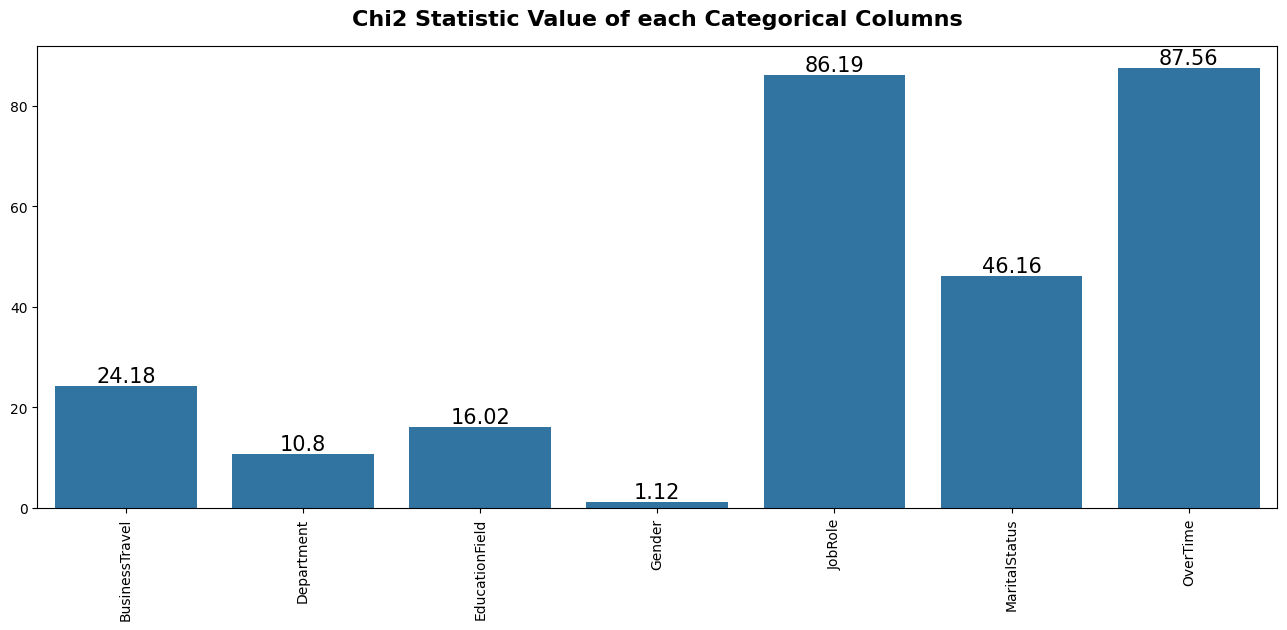

In [21]:
columns = list(chi2_statistic.keys())
values = list(chi2_statistic.values())

plt.figure(figsize=(16,6))
sns.barplot(x=columns, y=values)
plt.xticks(rotation=90)
plt.title("Chi2 Statistic Value of each Categorical Columns",fontweight="black",size=16,pad=15)
for index,value in enumerate(values):
    plt.text(index,value,round(value,2),ha="center",va="bottom",size=15)

plt.show()

In [22]:
# df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

## EDA

In [23]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

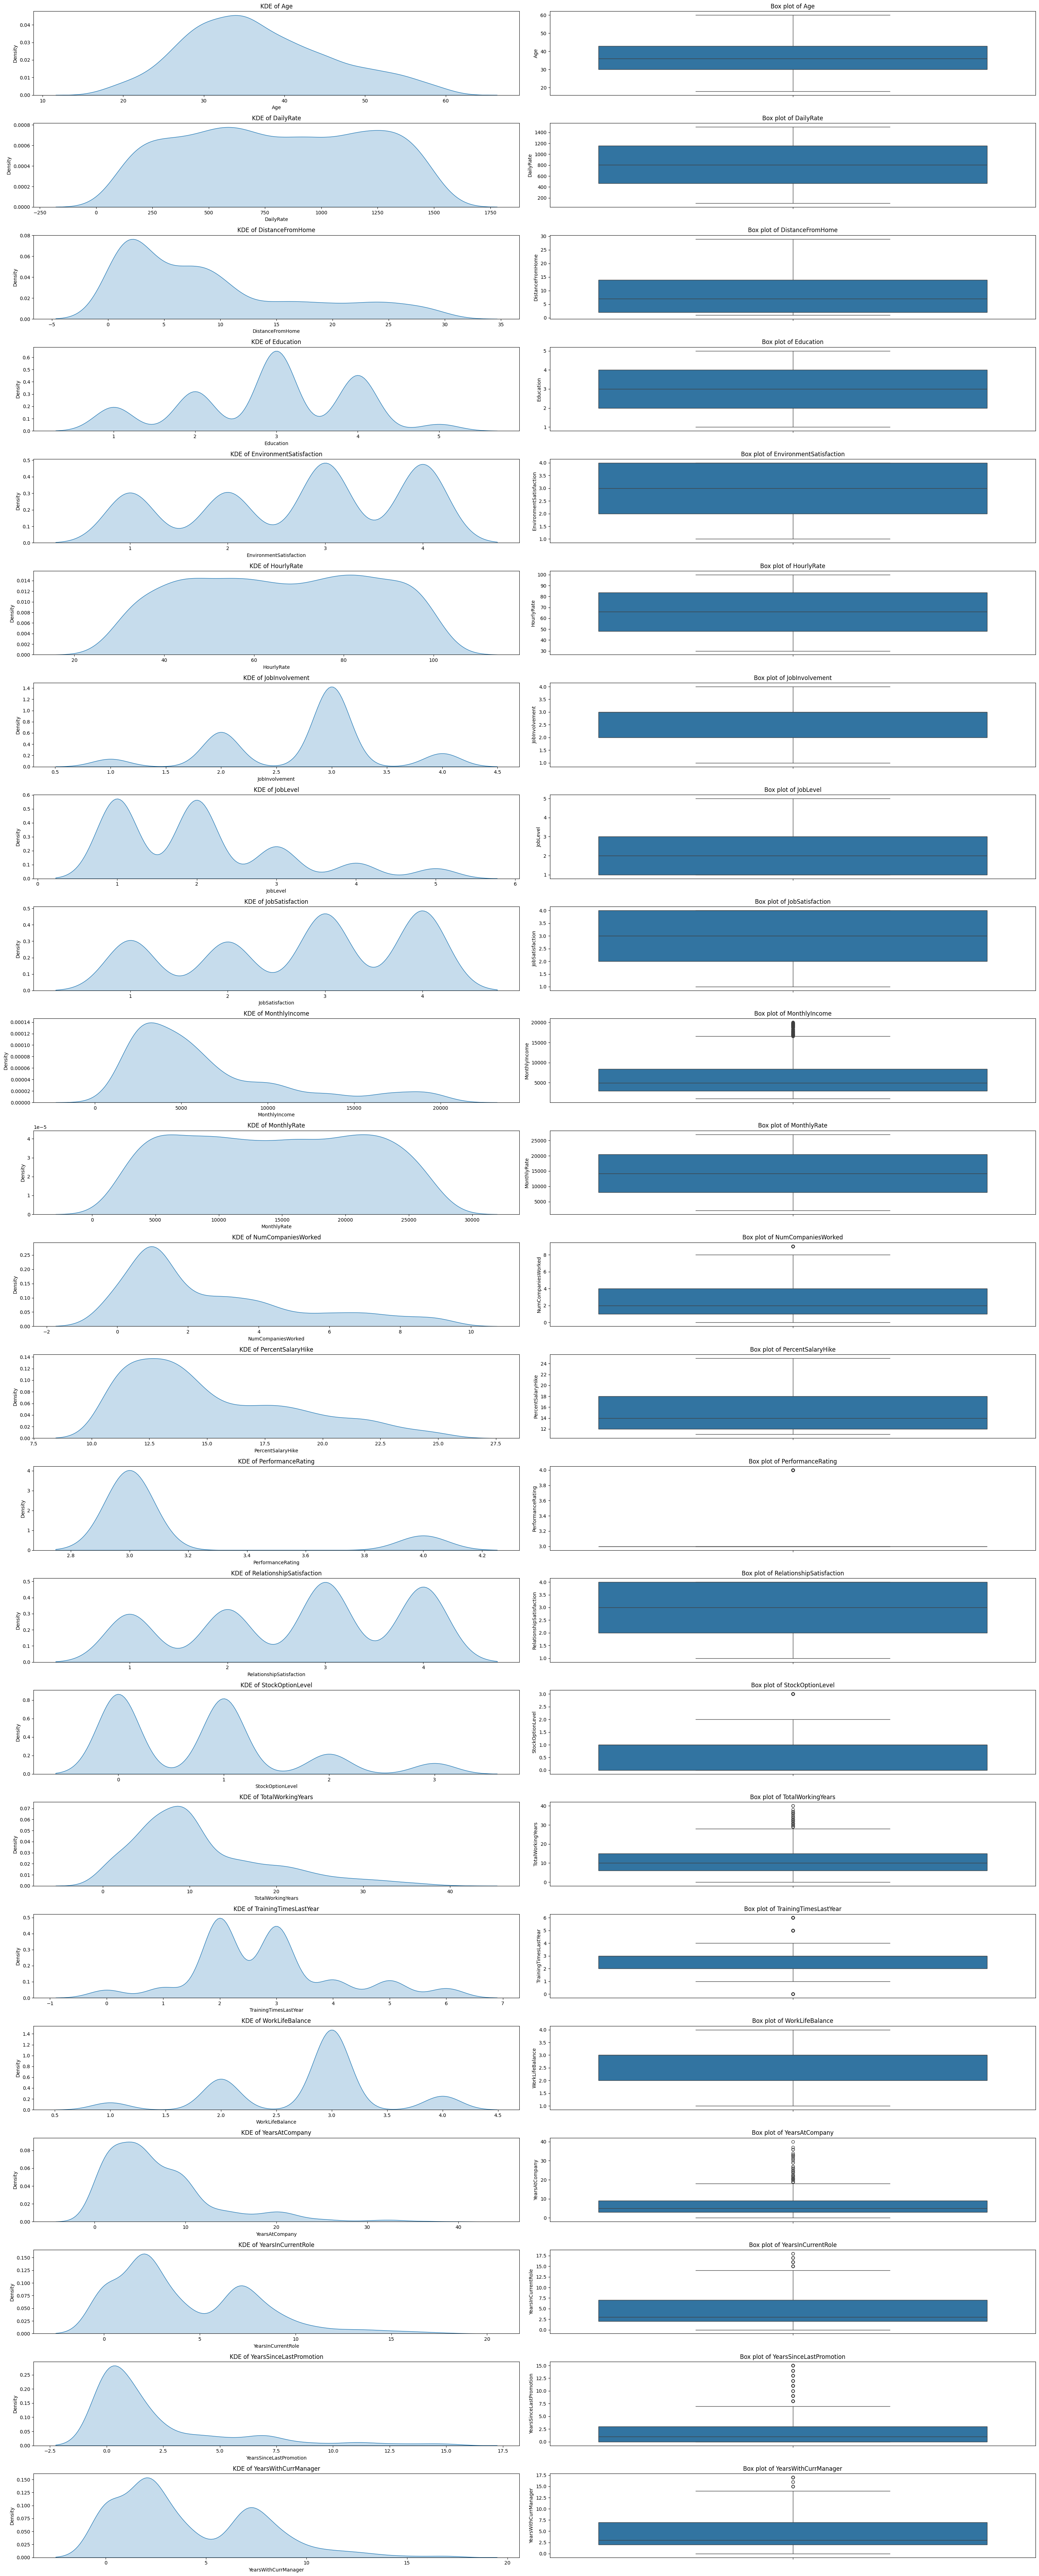

In [24]:
fig = plt.figure(figsize=(30, 80))  # Adjusted figure size for a taller layout
grid = plt.GridSpec(25, 2)

counter = 0

for col in df[num_cols]:
    # KDE plot
    kde_ax = fig.add_subplot(grid[counter, 0])
    sns.kdeplot(x=col, data=df, fill=True, ax=kde_ax)
    kde_ax.set_title(f'KDE of {col}')
    
    # Box plot
    box_ax = fig.add_subplot(grid[counter, 1])
    sns.boxplot(data=df[col], ax=box_ax)
    box_ax.set_title(f'Box plot of {col}')
    
    counter += 1
plt.tight_layout()
plt.show()

### Attrition Column

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/569308069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'red', 'No': 'green'})


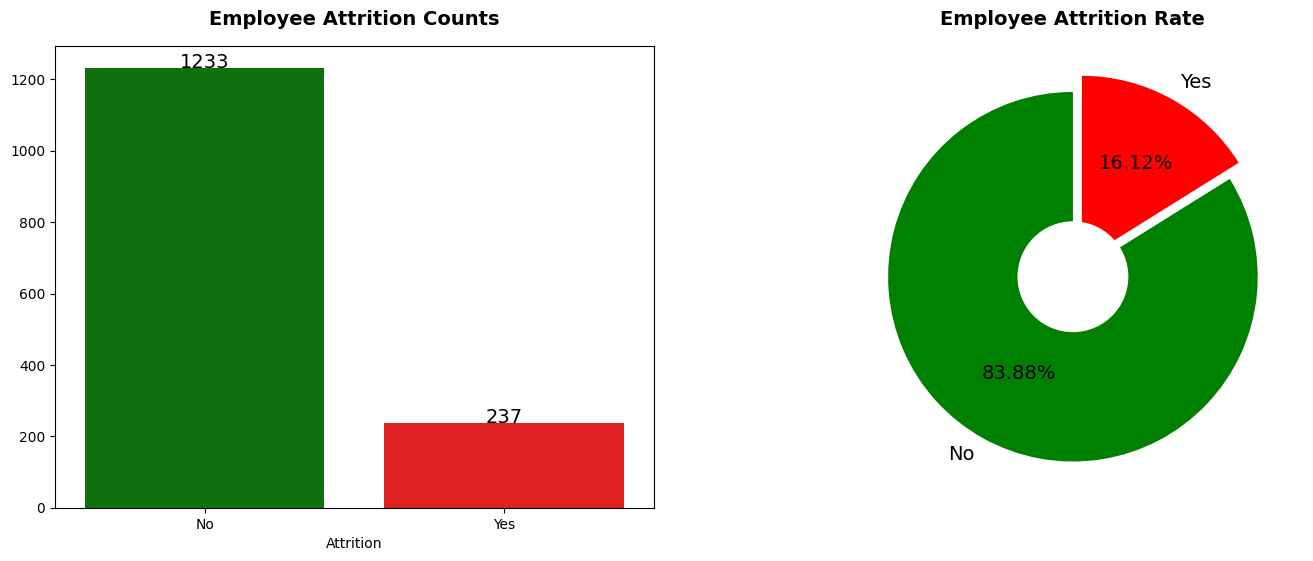

In [25]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'red', 'No': 'green'})
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette(['green', 'red'], len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

- no attirition is significantly higher, most people in the company don't want to leave

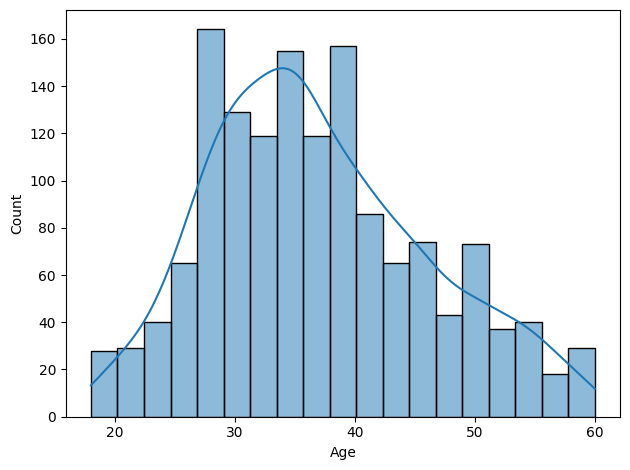

In [26]:
#seeing employee age and count
sns.histplot(data=df, x='Age', kde=True)
plt.tight_layout()
plt.show()

## Questions to Answer

1.	What are the key factors contributing to employee attrition?
2.	How does MonthlyIncome vary across different departments and JobRole?
3.	Is there a correlation between YearsAtCompany and Attrition?
4.	How does StockOption differ by JobRole?
5.	What is the impact of OverTime on employee performance (PerformanceRating)?
6.	Are there any patterns in Attrition based on BusinessTravel frequency?
7.	Which job roles have the highest average YearsAtCompany?
8.	Is there a relationship between EducationField and PerformanceRating?
9.	How does DistanceFromHome influence employee attrition?

### Q1.	What are the key factors contributing to employee attrition?

In [27]:
fig = px.histogram(df, x='JobRole', color='Attrition', barmode='group',
             facet_col='OverTime', facet_row='WorkLifeBalance', text_auto=True, color_discrete_sequence=["red", "green"],
             title="Attrition by Job Role, OverTime, and Work-Life Balance")
fig.update_layout(xaxis_title='Job Role', yaxis_title='Count', height=800)
fig.show()

- Employees who workes OverTime as Reasearch Scientist, Lab Tech and Sales Executive tend to leave the company even if they have better worklife Balance

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/1885292274.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




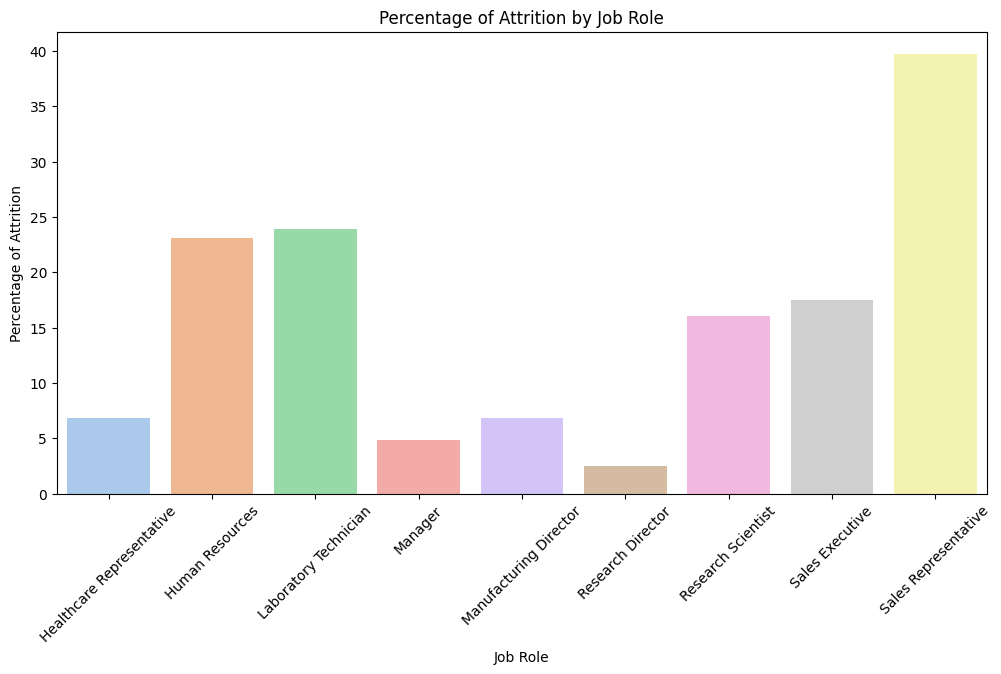

In [28]:
attrition_by_role = df[df['Attrition'] == 'Yes'].groupby('JobRole').size() / df.groupby('JobRole').size() * 100

attrition_by_role = attrition_by_role.reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition (%)', data=attrition_by_role, palette='pastel')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Job Role')
plt.xticks(rotation=45) 
plt.show()


- sales have the highest attrition, maybe because sales have higher work preasure than most. while next is human resources and laboratory techncian

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/1853510110.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




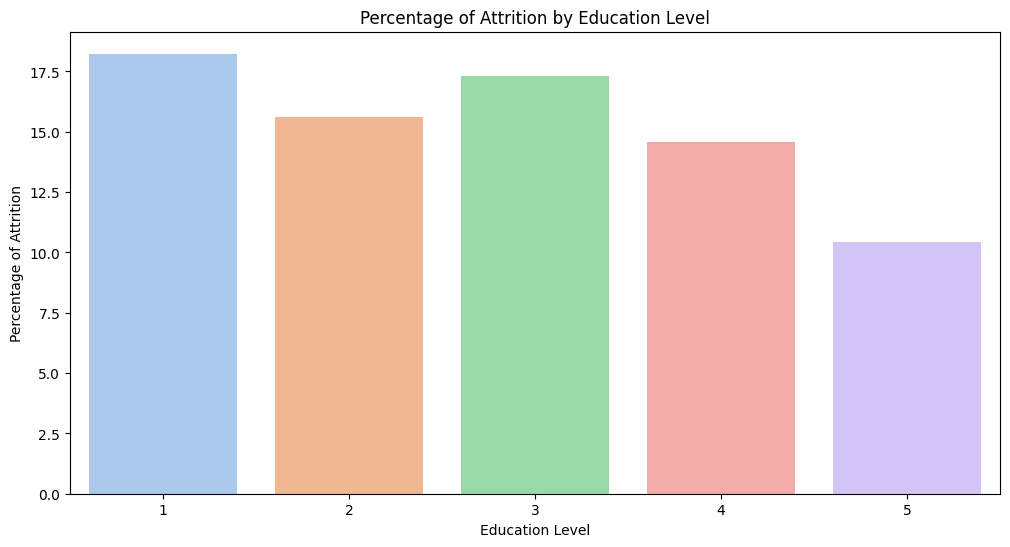

In [29]:
attrition_by_education = df[df['Attrition'] == 'Yes'].groupby('Education').size() / df.groupby('Education').size() * 100

attrition_by_education = attrition_by_education.reset_index()
attrition_by_education.columns = ['Education', 'Attrition (%)']
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Attrition (%)', data=attrition_by_education, palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Education Level')
plt.show()


as the education gets higher the rate lowers, doctors have the least while Below College have the higher. maybe Higher-educated employees might be more likely to find job roles that align well with their career goals

### Q2. How does MonthlyIncome vary across different departments and Job Roles?

In [30]:
fig = px.histogram(df, x='Department', y='MonthlyIncome', color='Department',
             title="Average Monthly Income Across Different Departments",histfunc='avg' )
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.show()

- All Departements nearly have the same avg montly income of about 7k
    - First is Sales with 6.96k
    - Second is HR with 6.66k
    - Third is Research & Development with 6.28k

In [31]:
fig = px.histogram(df, y='MonthlyIncome', x='JobRole', color='Department',
             title="Average Monthly Income Across Different Job Roles", histfunc='avg', barmode='group')
fig.update_layout(xaxis_title='Job Role', yaxis_title='MonthlyIncome', height=600)
fig.show()

- Avg Monthly income for maganers in different jobroles and departments are above 17k
- Avg Monthly income for HRs are 4.24k
- for Sales Executive are 6.9k while Rep. 2.6k

### Q3. Is there a correlation between YearsAtCompany and Attrition?

In [32]:
# Group by YearsAtCompany and Attrition, then count occurrences
count_df = df.groupby(["YearsAtCompany", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each YearsAtCompany
total_counts = df.groupby('YearsAtCompany').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="YearsAtCompany")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="YearsAtCompany", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of YearsAtCompany Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="YearsAtCompany",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/3576101202.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




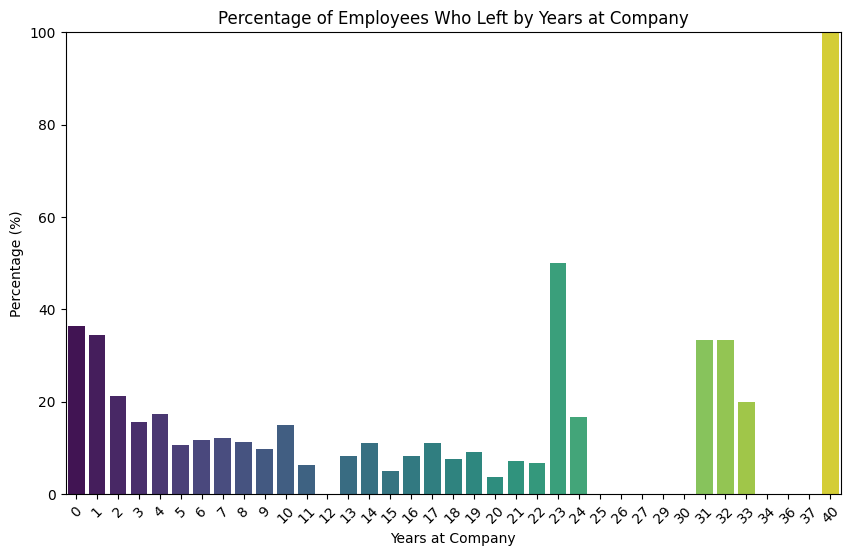

In [33]:
df_left = df[df['Attrition'] == 'Yes']

# Count the total number of employees and the number of employees who left for each year
total_counts = df.groupby('YearsAtCompany').size()
left_counts = df_left.groupby('YearsAtCompany').size()

# Calculate percentages
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsAtCompany', y='Percentage', palette='viridis')

# Customizing the plot
plt.title('Percentage of Employees Who Left by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- new employees tend to stay more than employees who have been wokring for a long time except for the first two years as 40% leave in there first two years. 

<Figure size 1000x600 with 0 Axes>

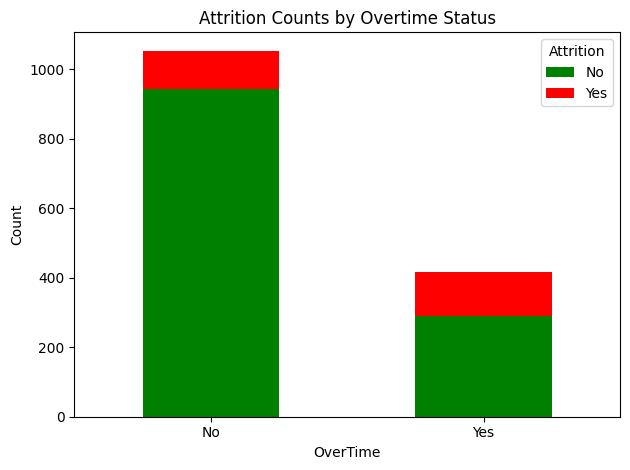

In [34]:
attrition_counts = df.groupby(['OverTime', 'Attrition']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
attrition_counts.plot(kind='bar', stacked=True, color={'Yes': 'red', 'No': 'green'})
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Counts by Overtime Status')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout();
plt.show();


- 30% of Employees who work overtime tend to leave the company

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/1975138634.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




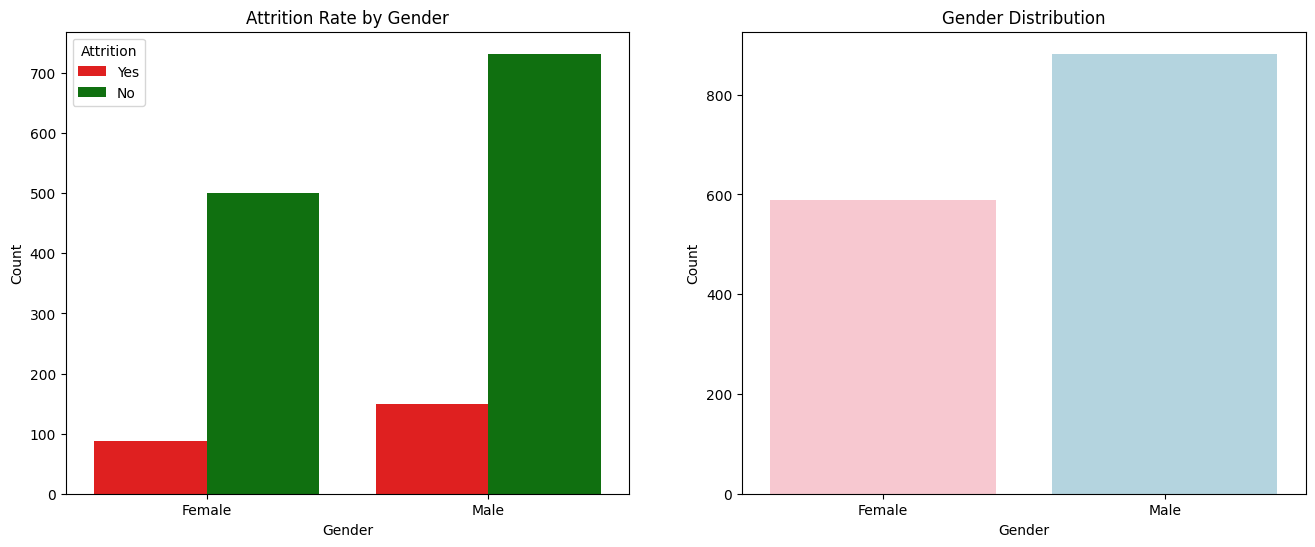

In [35]:
#seeing attrition by gender
attrition_palette = {'Yes': 'red', 'No': 'green'}
gender_palette = {'Male': 'lightblue', 'Female': 'pink'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df, palette=attrition_palette, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Attrition Rate by Gender')

#Count of Male and Female Employees
sns.countplot(x='Gender', data=df, palette=gender_palette, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender Distribution')

plt.show()

- male tend to have more attrition but thats just due to there being more than female.
- overall male leave 16% while female leave 14%. so gender has no effect

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/2004884461.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




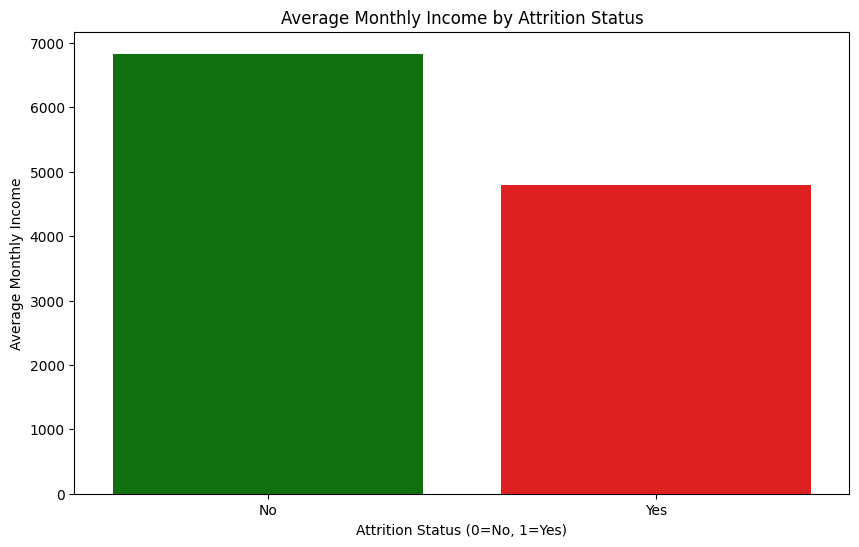

In [36]:
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition Status (0=No, 1=Yes)')
plt.ylabel('Average Monthly Income')
plt.show()

- average monthly income by attrition, people that are paid lower are more likely to leave

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/380580998.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




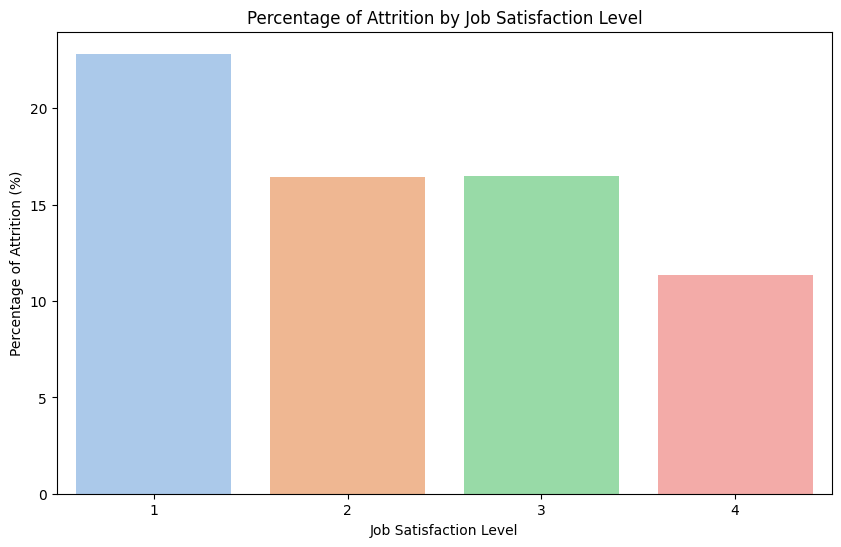

In [37]:
attrition_by_satisfaction = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction').size() / df.groupby('JobSatisfaction').size() * 100
attrition_by_satisfaction = attrition_by_satisfaction.reset_index()
attrition_by_satisfaction.columns = ['JobSatisfaction', 'Attrition (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='Attrition (%)', data=attrition_by_satisfaction, palette='pastel')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Percentage of Attrition (%)')
plt.title('Percentage of Attrition by Job Satisfaction Level')
plt.show()


- Less job satisfaction means more people leaving

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/1475576049.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




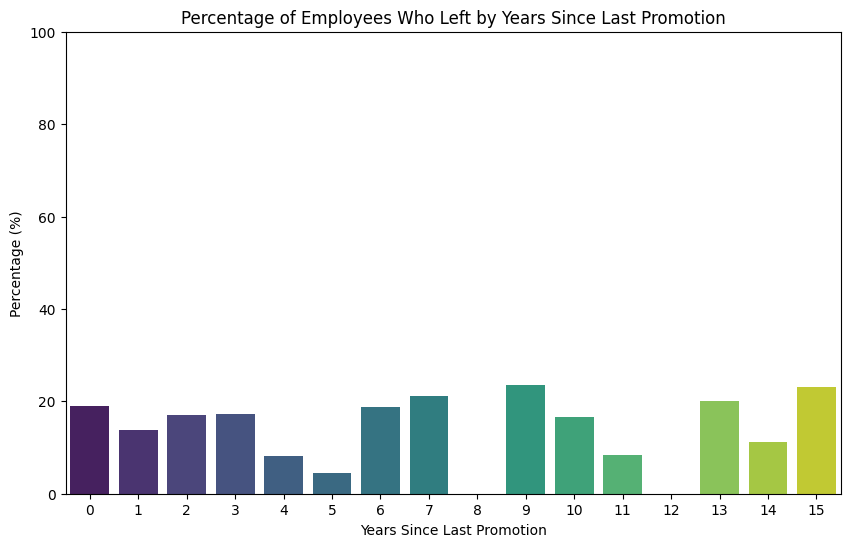

In [38]:
# Filter for employees who have left the company
df_left = df[df['Attrition'] == 'Yes']
total_counts = df.groupby('YearsSinceLastPromotion').size()
left_counts = df_left.groupby('YearsSinceLastPromotion').size()
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsSinceLastPromotion', y='Percentage', palette='viridis')
plt.title('Percentage of Employees Who Left by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- promotion seems to have no pattern and no effect on leaving

### Q4. How does StockOption differ by JobRole?

In [39]:
fig = px.histogram(df, y='JobRole', x='StockOptionLevel', color='StockOptionLevel', histfunc="count",
             title="Stock Option Level by Job Role", text_auto=True)
fig.update_layout(xaxis_title='Stock Option Level', yaxis_title='Job Role')
fig.show()

- Sales Executive, Lab Technician and Research Scientist have the highest percentages in stock option levels (1,2,3)

### Q5. What is the impact of OverTime on employee performance (PerformanceRating)?

In [40]:
fig = px.histogram(df, x='OverTime', y='PerformanceRating', color='PerformanceRating', histfunc="count",
             title="Performance Rating by OverTime")
fig.update_layout(xaxis_title='OverTime', yaxis_title='Performance Rating')
fig.show()

- There is no impact nearly on performance rating of employees as they with overtime and rating excellent(3) or outstanding(4) nearly the same percentage 28%

### Q6. Are there any patterns in Attrition based on BusinessTravel frequency?

In [41]:
fig = px.histogram(df, x='BusinessTravel', color="Attrition", color_discrete_map={"Yes":"red", "No":"green"}, barmode='group',
             title="Attrition by Business Travel Frequency", text_auto=True)
fig.update_layout(xaxis_title='Business Travel', yaxis_title='Count')
fig.show()

- Employees who travels frequently on buissness travels tend to leave the company with 25% of them

### Q7. Which job roles have the highest average YearsAtCompany?

In [42]:
fig = px.histogram(df, x='JobRole', y='YearsAtCompany', color='JobRole',
             title="Average Years at Company by Job Role",histfunc="avg",
             labels={'YearsAtCompany': 'Average Years at Company'})
fig.update_layout(xaxis_title='Job Role', yaxis_title='Average Years at Company')
fig.show()

- Managers and Directors have highest avg years at company with 14.5 years and 11 years in order

### Q8. Is there a relationship between EducationField and MonthlyIncome?

In [43]:
fig = px.histogram(df, x='EducationField', y='MonthlyIncome', color='EducationField', histfunc="avg",
             title="Monthly Income by Education Field")
fig.update_layout(xaxis_title='Education Field', yaxis_title='Monthly Income')
fig.show()

- Employees with Marketing background are the highest with avg monthly income 7.35k and nearly same with HR education field with 7.24k

### Q9. How does DistanceFromHome influence employee attrition?

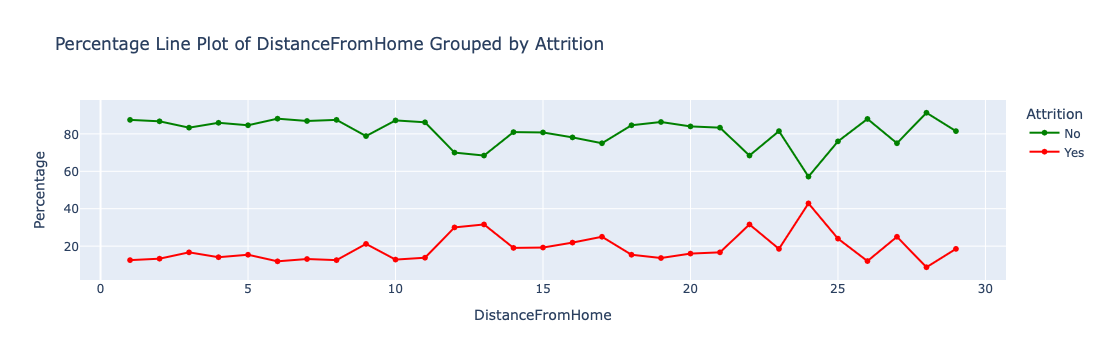

In [171]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="DistanceFromHome", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- as distance from home increases, the percentage of attrition increases being at its atmost level when distance is larger than 10, espicially between 21-25 with 25%
    - distance from 5-10, the employees attrition percentage is 14.6%
    - 11-15, percentage is 21.7%
    - 16-20, percentage is 18.4%

### Q10. How does Age affect Attrition?

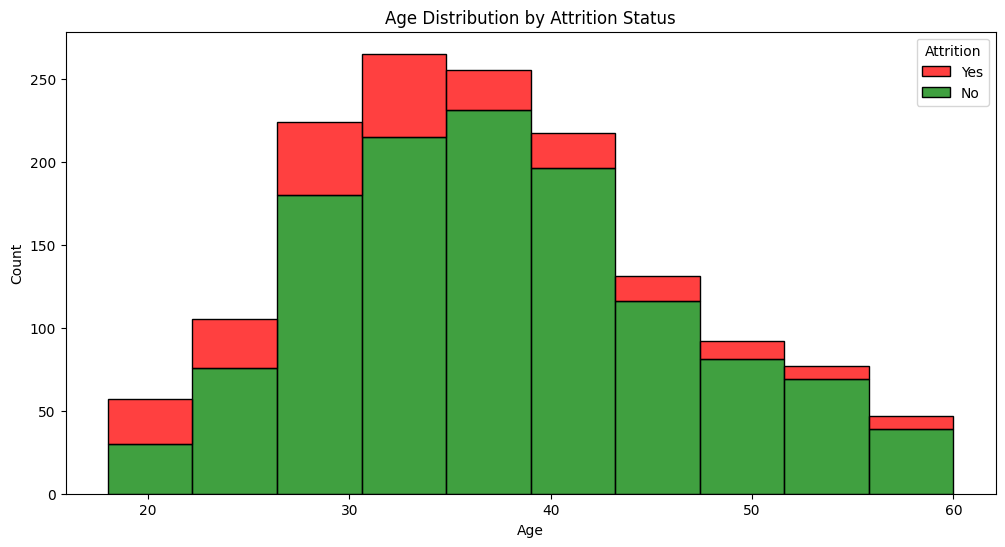

In [44]:
#attrition in all ages
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette={'Yes': 'red', 'No': 'green'}, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.show()

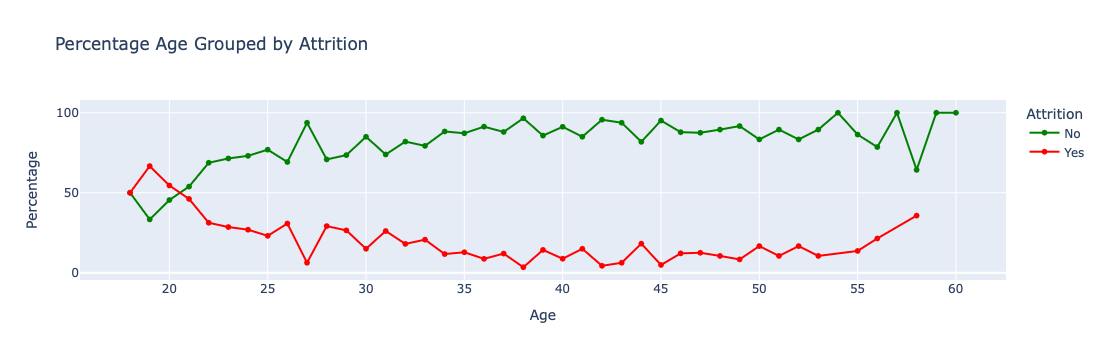

In [45]:
# Group by Age and Attrition, then count occurrences
count_df = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each Age
total_counts = df.groupby('Age').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on='Age')
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

fig = px.line(
    count_df, 
    x="Age", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Age Grouped by Attrition')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified")

# Show plot
fig.show()

- most employees are between age 25-40
- most people with high attrition are between 25-35
- old employees have a low attrition rate probably because its hard to find a job at that age

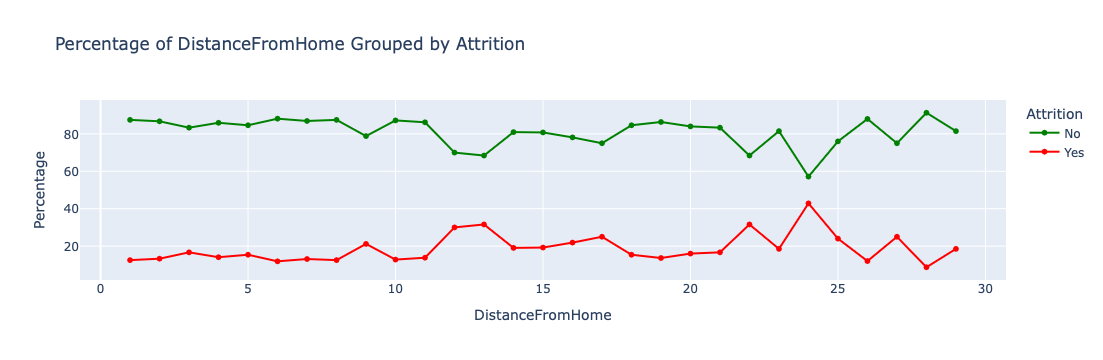

In [46]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df, 
    x="DistanceFromHome", 
    y='Percentage', 
    color='Attrition', 
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- as distance from home increases, the percentage of attrition increases being at its atmost level when distance is larger than 10, espicially between 21-25 with 25%
    - distance from 5-10, the employees attrition percentage is 14.6%
    - 11-15, percentage is 21.7%
    - 16-20, percentage is 18.4%

## Feature Engineering

In [47]:
df_corr = df.copy()
df_corr["Attrition"] = df_corr["Attrition"].replace({"No":0, "Yes":1})
df_corr["Satisfaction"] = (0.1*df_corr["EnvironmentSatisfaction"]) + (0.1*df_corr["JobSatisfaction"]) + (0.05*df_corr["RelationshipSatisfaction"])
# df_corr["IncomeRate"] = (0.06*df_corr["DailyRate"]) + (0.01*df_corr["HourlyRate"]) + (0.02*df_corr["MonthlyRate"])
df_corr["EmployeeExperience"] = round(((0.13*df_corr["YearsAtCompany"]) + (0.16*df_corr["YearsInCurrentRole"]) + (0.03*df_corr["YearsSinceLastPromotion"]) + (0.16*df_corr["YearsWithCurrManager"])),1)
num_corr = [col for col in df_corr.columns if df_corr[col].dtype != "object"]

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/4111753718.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



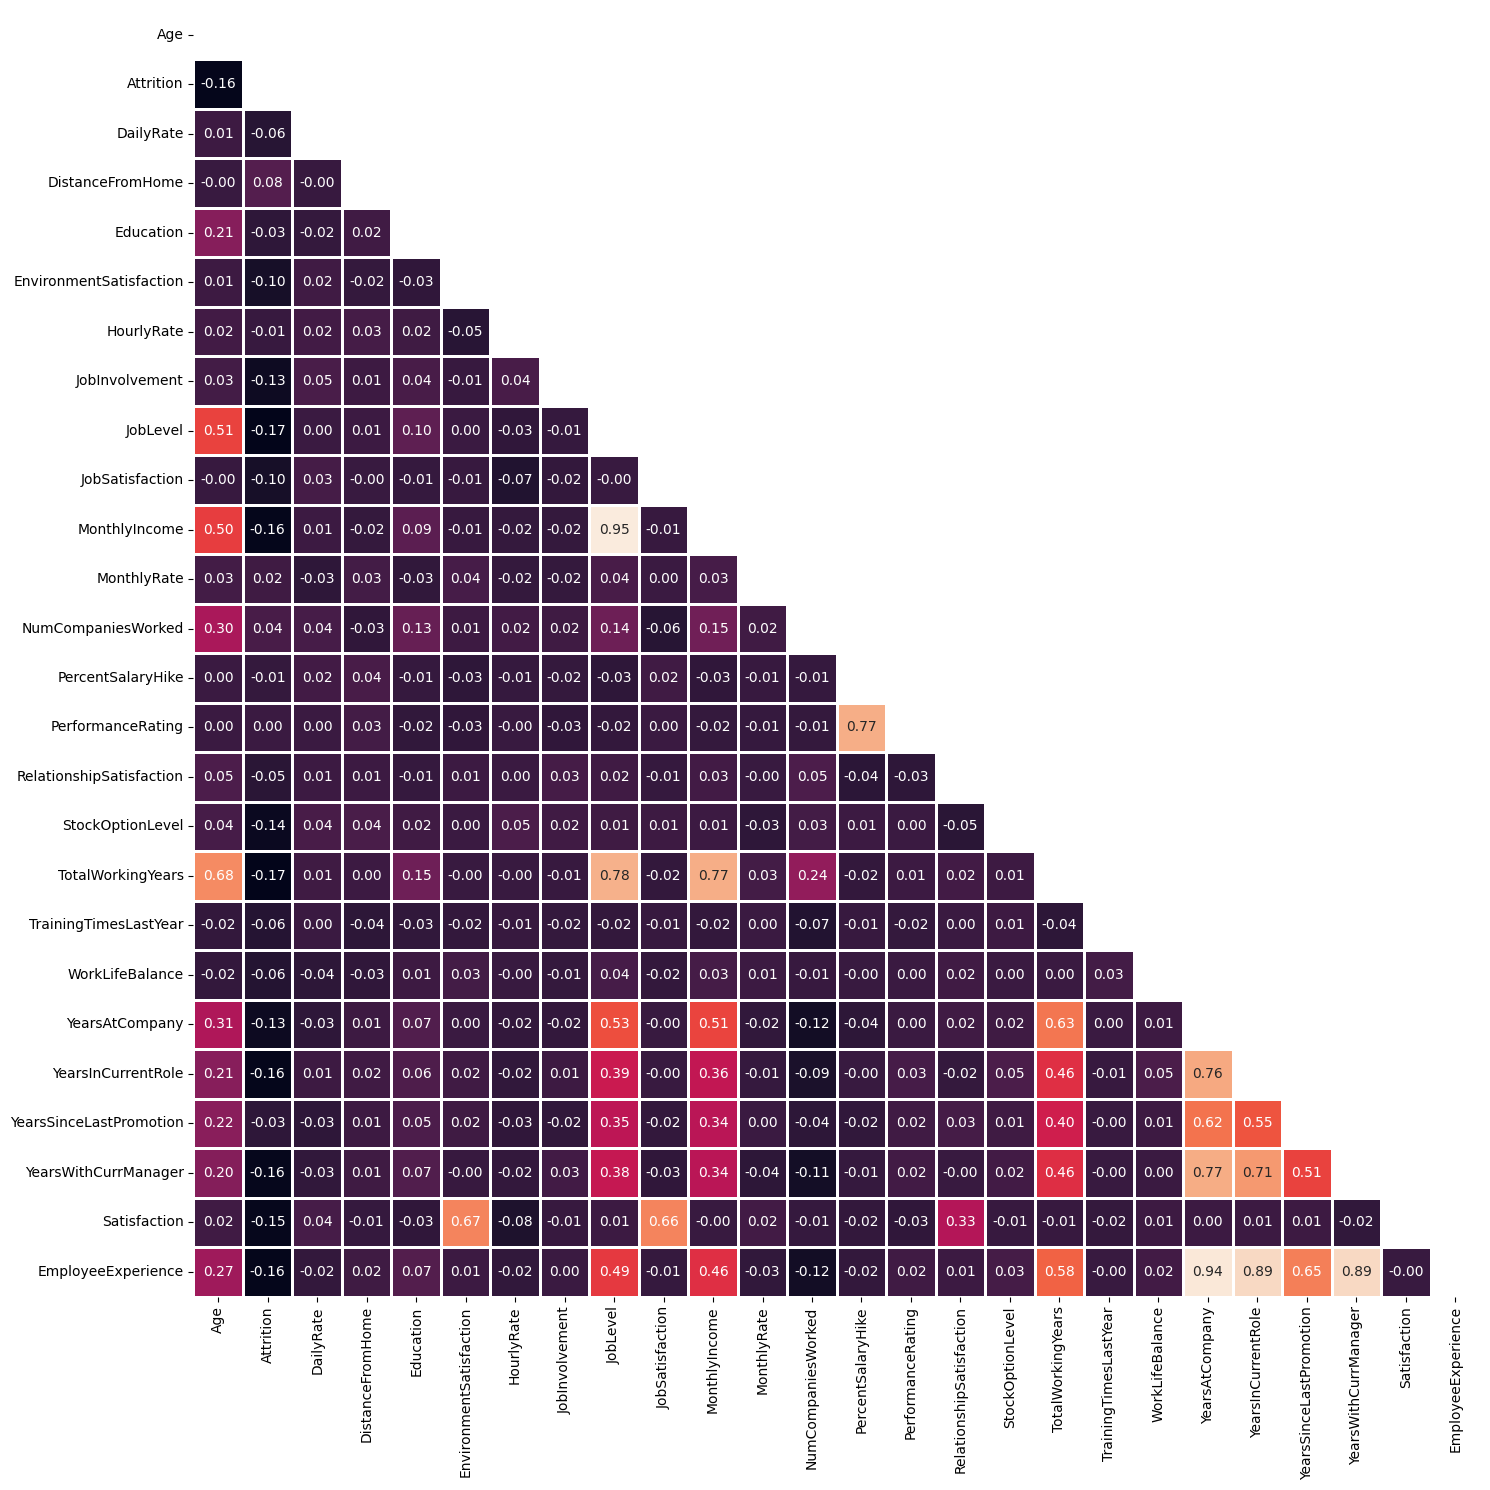

In [48]:
# Create a mask for the upper triangle (True means the cell will be hidden)
mask = np.triu(np.ones_like(df_corr[num_corr].corr(), dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(df_corr[num_corr].corr(),mask = mask, fmt='.2f', annot=True, linewidths=2, square=True, cbar=False)
plt.tight_layout()
plt.show()

In [49]:
df["Satisfaction"] = (0.1*df["EnvironmentSatisfaction"]) + (0.1*df["JobSatisfaction"]) + (0.05*df["RelationshipSatisfaction"])
df["EmployeeExperience"] = round(((0.13*df["YearsAtCompany"]) + (0.16*df["YearsInCurrentRole"]) + (0.03*df["YearsSinceLastPromotion"]) + (0.16*df["YearsWithCurrManager"])),1)

In [50]:
df = df.drop(columns=["EnvironmentSatisfaction", "JobSatisfaction", "RelationshipSatisfaction",
                     "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"])

In [51]:
df_cpy = df.copy()

In [52]:
df_cpy["Attrition"] = df_cpy["Attrition"].replace({"No":0, "Yes":1})
num_cpy = [col for col in df_cpy.columns if df_cpy[col].dtype != "object"]

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/2209738165.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



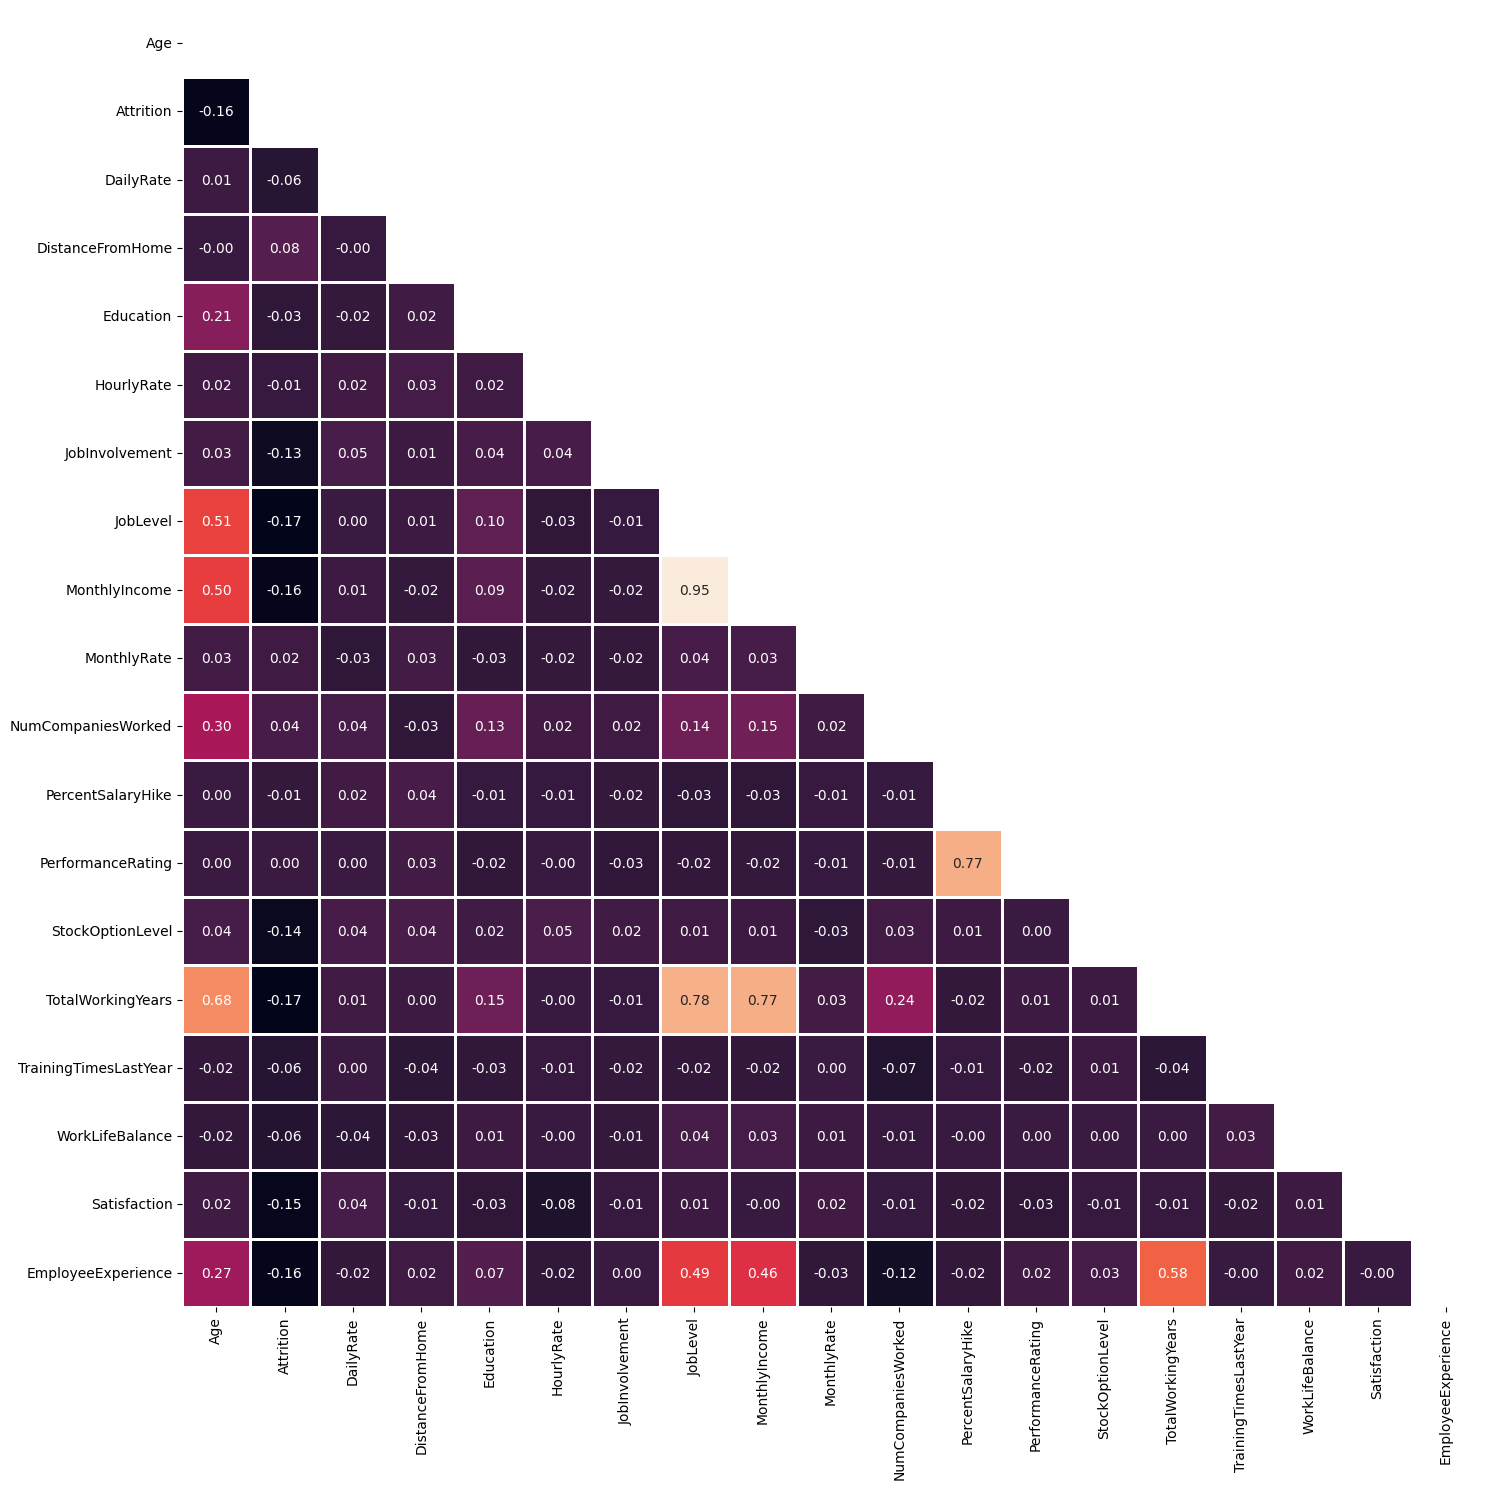

In [53]:
# Create a mask for the upper triangle (True means the cell will be hidden)
mask = np.triu(np.ones_like(df_cpy[num_cpy].corr(), dtype=bool))

plt.figure(figsize=(15,15))
sns.heatmap(df_cpy[num_cpy].corr(),mask = mask, fmt='.2f', annot=True, linewidths=2, square=True, cbar=False)
plt.tight_layout()
plt.show()

# Modeling

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay,classification_report

In [74]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'Satisfaction', 'EmployeeExperience'],
      dtype='object')

In [169]:
df_model = df[["Age","Attrition", 'JobInvolvement', 'JobLevel', "MonthlyIncome", "MaritalStatus", 'StockOptionLevel',
       'TotalWorkingYears', "Satisfaction", "EmployeeExperience", "OverTime"]]

# df_model = df

In [98]:
df_model.head()

Age Attrition  JobInvolvement  JobLevel  MonthlyIncome MaritalStatus  \
0   41       Yes               3         2           5993        Single   
1   49        No               2         2           5130       Married   
2   37       Yes               2         1           2090        Single   
3   33        No               3         1           2909       Married   
4   27        No               3         1           3468       Married   

   StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
0                 0                  8          0.65                 2.2   
1                 1                 10          0.70                 3.6   
2                 0                  7          0.80                 0.0   
3                 0                  8          0.85                 2.2   
4                 1                  6          0.50                 1.0   

  OverTime  
0      Yes  
1       No  
2      Yes  
3      Yes  
4       No

In [99]:
X = df_model.drop(columns = ["Attrition"])
y = df_model["Attrition"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype=="object"]
num_cols = [col for col in X_train.columns if X_train[col].dtype!="object"]

## Encoding

In [102]:
# Initialize a LabelEncoder object
label_encoders = {}

# Apply LabelEncoder to each column
for column in X_train[cat_cols].columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le  # Save the encoder for inverse transformation if needed

In [103]:
# Now, transform the X_test using the fitted encoders
for column in X_test[cat_cols].columns:
    if column in label_encoders:  # Ensure the column exists in the encoders dictionary
        X_test[column] = label_encoders[column].transform(X_test[column])

## Scailing

In [104]:
# scaled_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate","MonthlyIncome", "MonthlyRate", "PercentSalaryHike"]
scaled_cols = ["Age", "MonthlyIncome"]

# Initialize a dictionary to hold the scalers
scalers = {}

# Apply StandardScaler to each column in the training set
for column in X_train[scaled_cols].columns:
    scaler = MinMaxScaler()
    X_train[column] = scaler.fit_transform(X_train[[column]])
    scalers[column] = scaler  # Save the scaler for each column

In [105]:
for column in X_test[scaled_cols].columns:
    if column in scalers:  # Ensure the column exists in the scalers dictionary
        X_test[column] = scalers[column].transform(X_test[[column]])

In [106]:
X_train.head()

Age  JobInvolvement  JobLevel  MonthlyIncome  MaritalStatus  \
1097  0.142857               2         1       0.067773              0   
727   0.000000               3         1       0.002212              2   
254   0.261905               3         2       0.311848              0   
1175  0.500000               3         2       0.225698              1   
1341  0.309524               3         2       0.167878              0   

      StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
1097                 3                  2          0.50                 0.3   
727                  0                  0          0.80                 0.0   
254                  1                 10          1.00                 1.0   
1175                 0                  7          0.75                 1.3   
1341                 1                 10          0.55                 2.9   

      OverTime  
1097         0  
727          0  
254          0  
1175         0  
1341         0

In [107]:
X_test.head()

Age  JobInvolvement  JobLevel  MonthlyIncome  MaritalStatus  \
1041  0.238095               3         2       0.392522              2   
184   0.833333               4         2       0.181201              0   
1222  0.142857               1         1       0.028752              1   
67    0.642857               3         3       0.458926              0   
220   0.428571               3         2       0.258294              2   

      StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
1041                 0                  6          0.70                 1.8   
184                  2                  5          0.65                 1.4   
1222                 1                  1          0.85                 0.1   
67                   1                 25          0.45                 0.1   
220                  0                 16          0.80                 4.7   

      OverTime  
1041         0  
184          0  
1222         0  
67           0  
220          0

### Target Column

In [108]:
target_le = LabelEncoder()
y_train = target_le.fit_transform(y = y_train)

In [109]:
y_test = target_le.transform(y_test)

### Helper Functions

In [110]:
# Function used to evaluate a classification model
def evaluate_classification_models(X_train, y_train, X_test, y_test, models):
    """
  Evaluates a list of models, stores results, and returns a DataFrame for comparison and trained models.

  Args:
      X_train (pd.DataFrame): Training features.
      y_train (pd.Series): Training target variable.
      X_test (pd.DataFrame): Testing features.
      y_test (pd.Series): Testing target variable.
      models (list): A list of scikit-learn model objects.

  Returns:
      models_df (pd.DataFrame): A DataFrame containing model names and evaluation metrics.
    """

    model_results = []
    trained_models = {}
    for model in models:
        model.fit(X_train, y_train)
        trained_models[model.__class__.__name__] = model  # Save trained model with name
        prediction = model.predict(X_test)
        prediction_train = model.predict(X_train)
        
        model_results.append({
            "Model-Name": model.__class__.__name__,
            "Test_Accuracy": accuracy_score(y_test, prediction) * 100,
            "Train_Accuracy": accuracy_score(y_train, prediction_train) * 100,
            "ROC_AUC": roc_auc_score(y_test, prediction),
            "F1_Score": f1_score(y_test, prediction),
            "Recall": recall_score(y_test, prediction),
            "Prediction":prediction
        })

    models_df = pd.DataFrame(model_results)
    models_df = models_df.set_index('Model-Name')
    return models_df.sort_values("F1_Score", ascending=False)

In [111]:
# Function used to plot confusion matrix and classification Report
def evaluate_classification_metrics(y_true, y_pred, target_names=None, display=True):
    """
    Evaluates a classification model by generating a confusion matrix, confusion matrix display (optional), and classification report.

    Args:
        y_true (pd.Series): Ground truth labels.
        y_pred (pd.Series): Predicted labels.
        target_names (list, optional): List of class names for improved readability of the confusion matrix. Defaults to None.
        display (bool, optional): Whether to display the confusion matrix visually using ConfusionMatrixDisplay. Defaults to True.

    Returns:
        dict: A dictionary containing the confusion matrix, classification report, and class names (if provided).
    """

    # Ensure y_true and y_pred are NumPy arrays for compatibility with sklearn metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=target_names)

    # Optionally display confusion matrix visually
    if display:
        ConfusionMatrixDisplay(cm, display_labels=target_names).plot()
        plt.show()  # Display the confusion matrix plot

    # Return results in a dictionary for easy access
    evaluation_results = {
        "Confusion Matrix": cm,
        "Classification Report": report,
        "Target Names": target_names,  # Include target names if provided
    }
    return evaluation_results

## Results

In [112]:
# Our classification models:
classification_models = [
    LogisticRegression(random_state=42),
    SVC(random_state=42, kernel="linear"),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5)
]

In [113]:
models_class = evaluate_classification_models(X_train, y_train, X_test, y_test, classification_models)
models_class

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                
GaussianNB                84.693878       82.312925  0.683710  0.444444   
LogisticRegression        87.414966       86.309524  0.579940  0.274510   
KNeighborsClassifier      86.394558       88.520408  0.552338  0.200000   
SVC                       86.734694       83.163265  0.500000  0.000000   

                        Recall  \
Model-Name                       
GaussianNB            0.461538   
LogisticRegression    0.179487   
KNeighborsClassifier  0.128205   
SVC                   0.000000   

                                                             Prediction  
Model-Name                                                               
GaussianNB            [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, ...  
LogisticRegression    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
KNeighborsClassifier  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...  
SVC                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/971934051.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



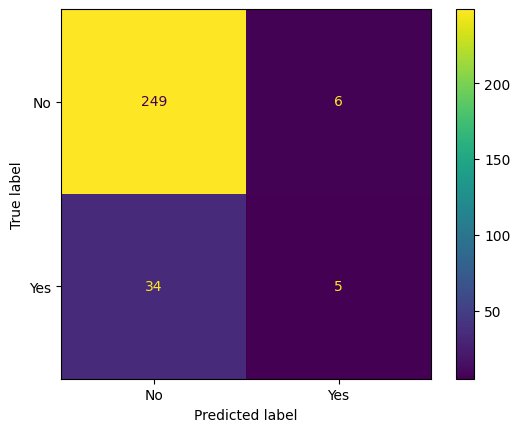

In [114]:
# Confusion Matrix for the best model accuracy
eval_result = evaluate_classification_metrics(y_test, models_class["Prediction"][2], target_names=["No","Yes"])

In [115]:
print(eval_result['Classification Report'])

              precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

## Imbalancing data

In [37]:
le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [38]:
encoder = OneHotEncoder()

encoded = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']])

In [39]:
encoded_df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

df = pd.concat([df,encoded_df],axis=1)
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime'],axis =1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

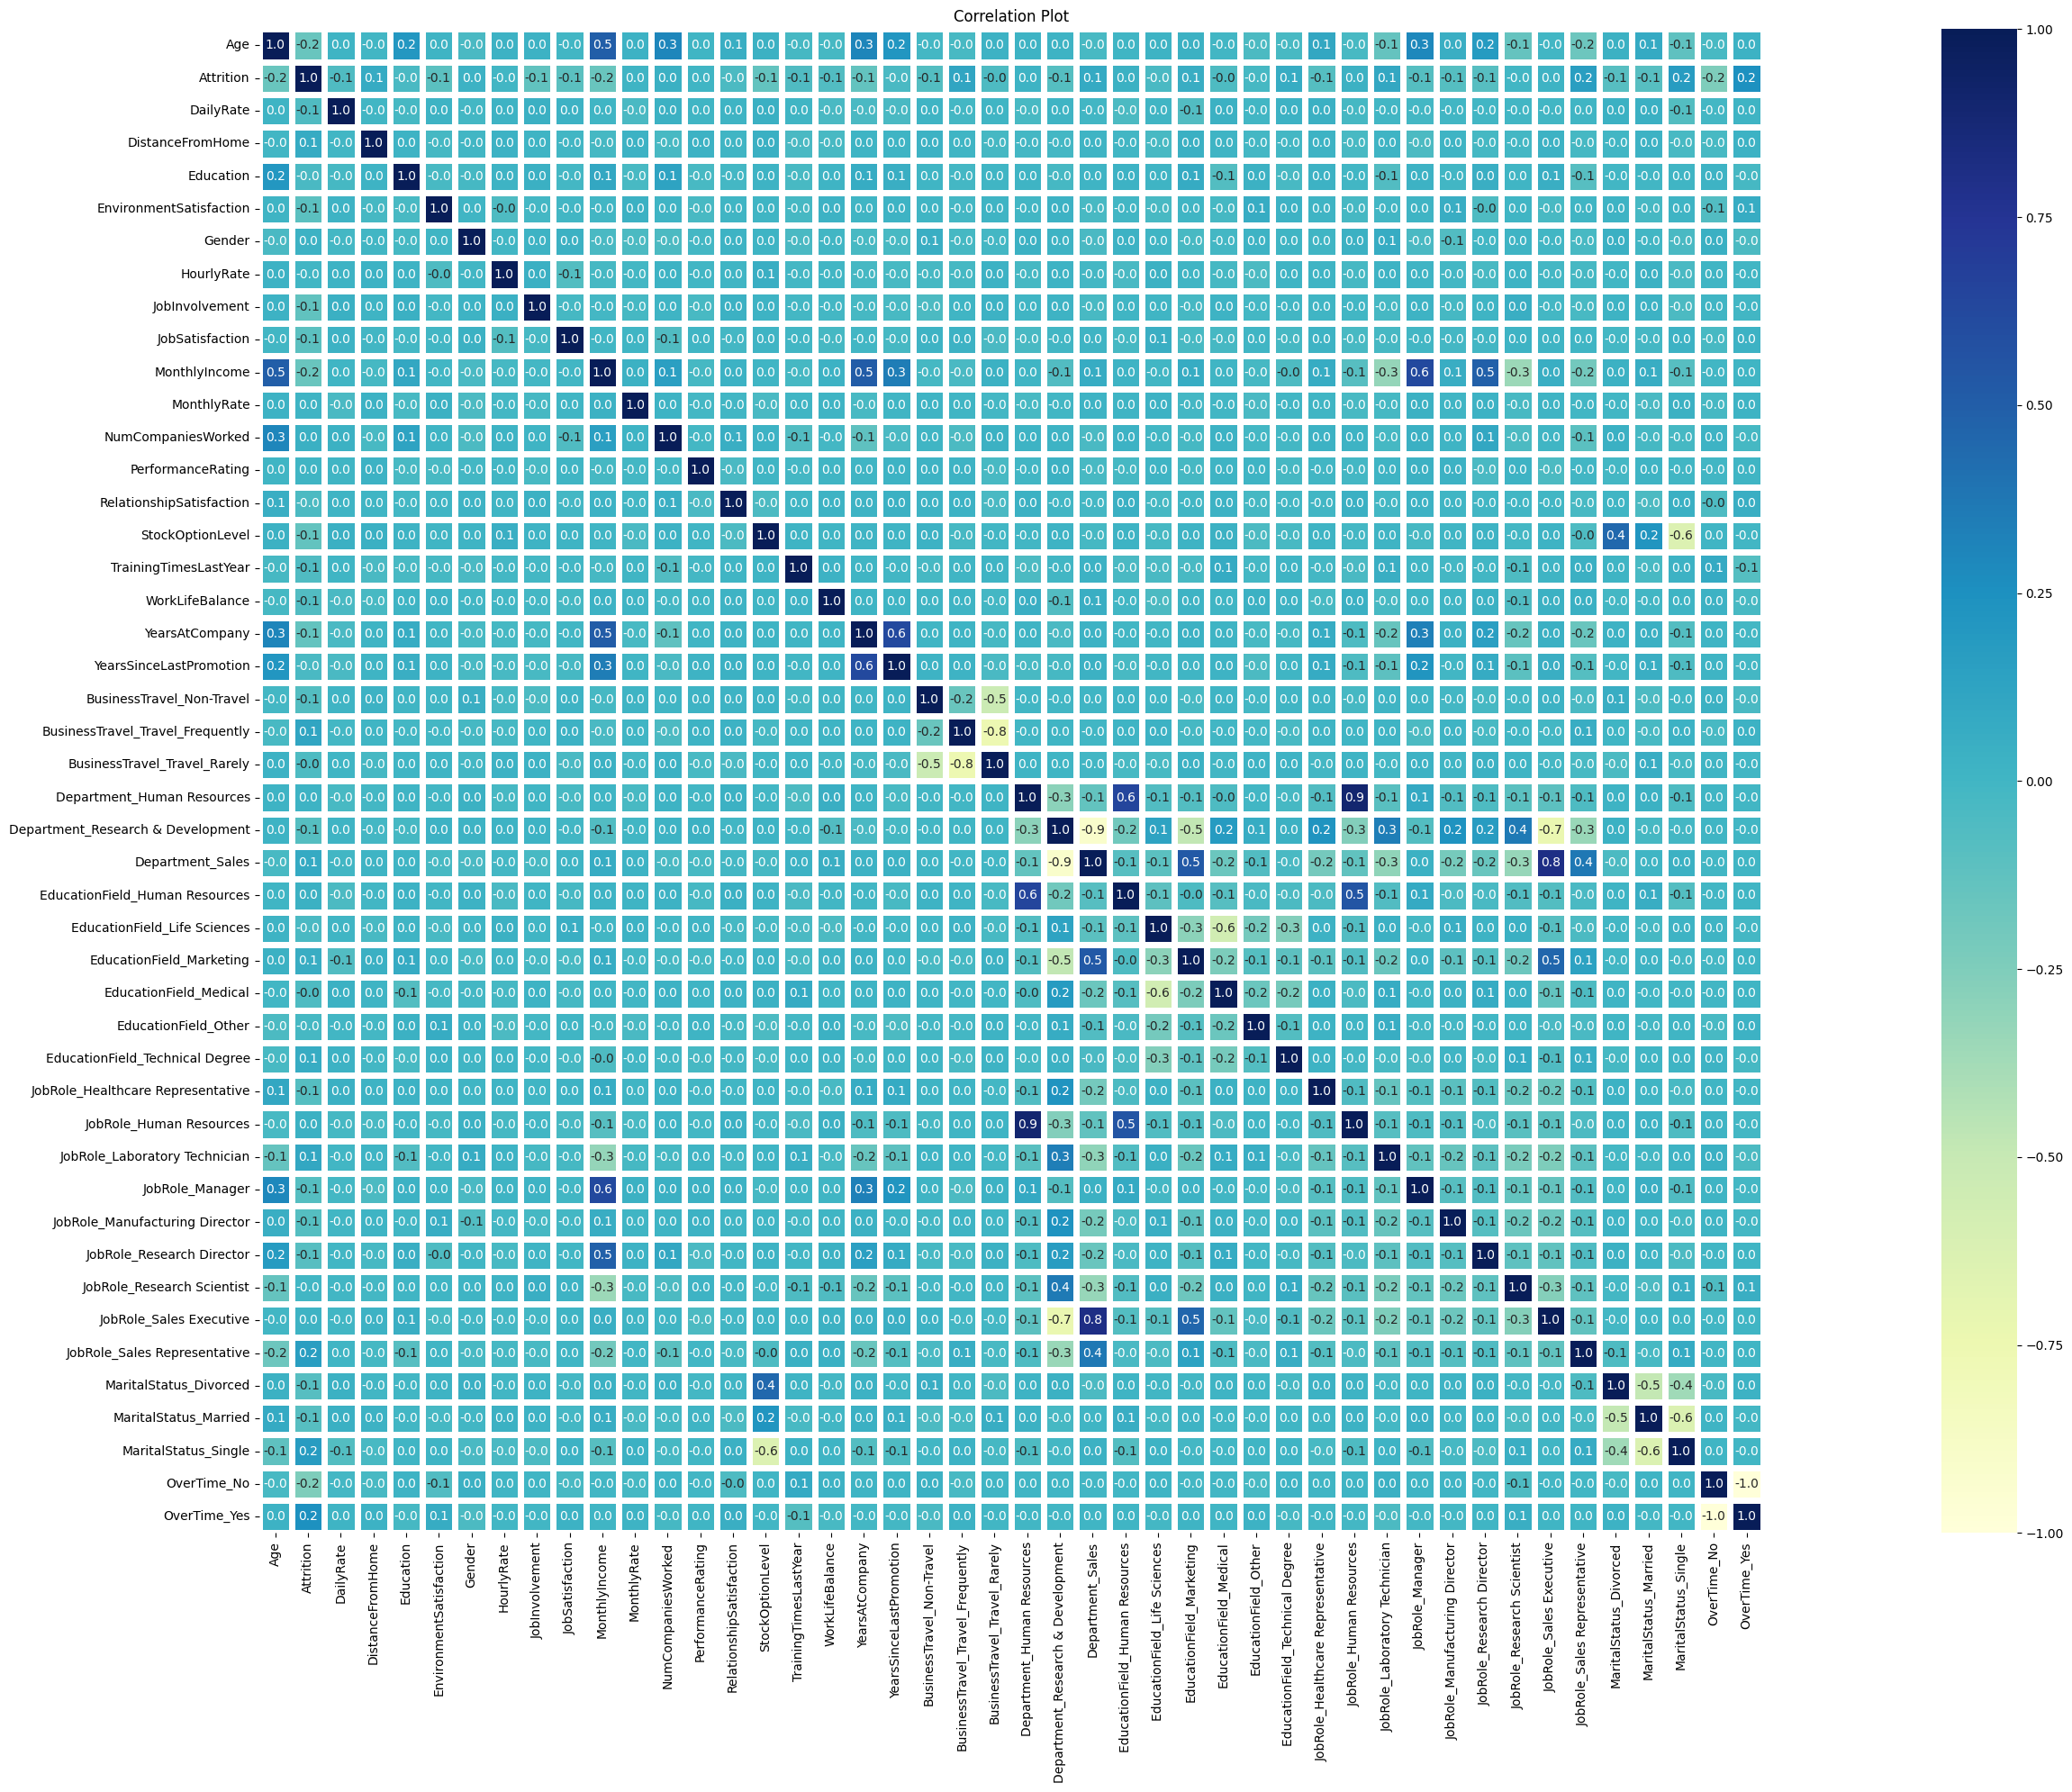

In [49]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),linewidths=5, annot=True, square=True,cmap='YlGnBu', fmt=".1f")
plt.tight_layout()
plt.show()

In [41]:
correlation_matrix = df.corr()
high_correlation_mask = correlation_matrix >= 0.75
highly_correlated_features = []


for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager
Department_Human Resources and JobRole_Human Resources
Department_Sales and JobRole_Sales Executive


In [42]:
# droping columns which are highly correlated
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
df.drop(columns=cols, inplace=True)

In [154]:
x = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [155]:
x = X.copy()

In [156]:
x["MaritalStatus"] = x["MaritalStatus"].replace({"Single":0,
                                               "Married":1,
                                               "Divorced":2})

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/2009262763.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [157]:
x["OverTime"] = x["OverTime"].replace({"No":0,
                                       "Yes":1})

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_22334/3086638906.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [158]:
x_smote.head()

Age  JobInvolvement  JobLevel  MonthlyIncome  MaritalStatus  \
0  0.142857               2         1       0.067773              2   
1  0.000000               3         1       0.002212              0   
2  0.261905               3         2       0.311848              2   
3  0.500000               3         2       0.225698              1   
4  0.309524               3         2       0.167878              2   

   StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
0                 3                  2          0.50                 0.3   
1                 0                  0          0.80                 0.0   
2                 1                 10          1.00                 1.0   
3                 0                  7          0.75                 1.3   
4                 1                 10          0.55                 2.9   

   OverTime  
0         0  
1         0  
2         0  
3         0  
4         0

In [159]:
y_smote.head()

0    No
1    No
2    No
3    No
4    No
Name: Attrition, dtype: object

In [160]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [161]:
cat_cols = [col for col in X_train_smote.columns if X_train_smote[col].dtype=="object"]
num_cols = [col for col in X_train_smote.columns if X_train_smote[col].dtype!="object"]

In [162]:
# scaled_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate","MonthlyIncome", "MonthlyRate"]
scaled_cols = ["Age", "MonthlyIncome"]

# Initialize a dictionary to hold the scalers
scalers = {}

# Apply StandardScaler to each column in the training set
for column in X_train_smote[scaled_cols].columns:
    scaler = MinMaxScaler()
    X_train_smote[column] = scaler.fit_transform(X_train_smote[[column]])
    scalers[column] = scaler  # Save the scaler for each column

In [163]:
for column in X_test_smote[scaled_cols].columns:
    if column in scalers:  # Ensure the column exists in the scalers dictionary
        X_test_smote[column] = scalers[column].transform(X_test_smote[[column]])

In [164]:
X_train_smote.head()

Age  JobInvolvement  JobLevel  MonthlyIncome  MaritalStatus  \
836   0.214286               3         2       0.182675              0   
1688  0.357143               3         1       0.073565              1   
1505  0.190476               3         1       0.107846              1   
1650  0.523810               3         4       0.644708              0   
1573  0.571429               3         2       0.221696              0   

      StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
836                  0                  5      0.750000            1.900000   
1688                 1                  4      0.672860            0.620044   
1505                 0                  5      0.513684            1.518947   
1650                 0                 22      0.589586            0.797715   
1573                 0                 12      0.773515            0.781921   

      OverTime  
836          1  
1688         1  
1505         0  
1650         1  
1573         0

In [165]:
X_test_smote.head()

Age  JobInvolvement  JobLevel  MonthlyIncome  MaritalStatus  \
1360  0.023810               1         1       0.069247              0   
1703  0.142857               2         1       0.060242              0   
1146  0.261905               3         1       0.070090              0   
1758  0.095238               2         1       0.087941              0   
374   0.666667               3         3       0.501211              1   

      StockOptionLevel  TotalWorkingYears  Satisfaction  EmployeeExperience  \
1360                 0                  1      0.657548            0.415097   
1703                 0                  5      0.687857            1.417143   
1146                 0                  6      0.750000            2.400000   
1758                 0                  1      0.502278            0.236448   
374                  0                 28      0.600000            0.900000   

      OverTime  
1360         0  
1703         1  
1146         0  
1758         0  
374          0

In [166]:
target_les = LabelEncoder()
y_train_smote = target_les.fit_transform(y_train_smote)

In [167]:
y_test_smote = target_les.transform(y_test_smote)

In [168]:
models_class_smote = evaluate_classification_models(X_train_smote, y_train_smote, X_test_smote, y_test_smote, classification_models)
models_class_smote

Test_Accuracy  Train_Accuracy   ROC_AUC  F1_Score  \
Model-Name                                                                
KNeighborsClassifier      79.081633       85.677749  0.793402  0.792929   
LogisticRegression        78.061224       76.470588  0.782389  0.779487   
SVC                       77.551020       76.726343  0.777534  0.775510   
GaussianNB                69.132653       72.186701  0.694827  0.701235   

                        Recall  \
Model-Name                       
KNeighborsClassifier  0.844086   
LogisticRegression    0.817204   
SVC                   0.817204   
GaussianNB            0.763441   

                                                             Prediction  
Model-Name                                                               
KNeighborsClassifier  [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, ...  
LogisticRegression    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...  
SVC                   [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...  
GaussianNB            [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, ...

/var/folders/_h/7dfcrzn17cl9jhdmsrms4ll40000gn/T/ipykernel_19816/646561262.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



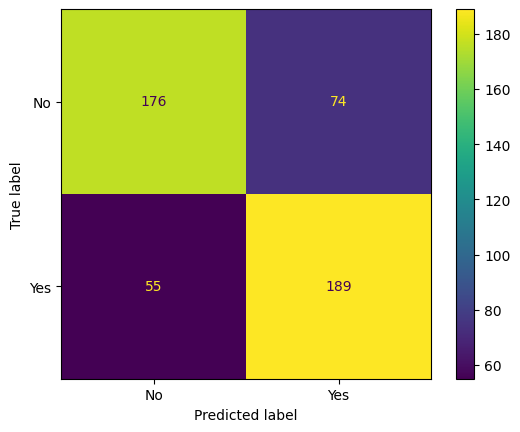

In [128]:
# Confusion Matrix for the best model accuracy
eval_result_smote = evaluate_classification_metrics(y_test_smote, models_class_smote["Prediction"][0], target_names=["No","Yes"])

In [129]:
print(eval_result_smote['Classification Report'])

              precision    recall  f1-score   support

          No       0.76      0.70      0.73       250
         Yes       0.72      0.77      0.75       244

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.74       494
weighted avg       0.74      0.74      0.74       494



## Models

### Logistic Regression

In [131]:
LR = LogisticRegression()
LR.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [132]:
lr_y_pred_train = LR.predict(X_train_smote)
lr_y_pred = LR.predict(X_test_smote)

In [133]:
acc_train_lr = accuracy_score(lr_y_pred_train, y_train_smote)
acc_lr = accuracy_score(lr_y_pred, y_test_smote)
print(acc_train_lr)
print(acc_lr)

0.768762677484787
0.7165991902834008


### KNN

In [134]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [135]:
knn_y_pred_train = KNN.predict(X_train_smote)
knn_y_pred = KNN.predict(X_test_smote)

In [136]:
acc_train_knn = accuracy_score(knn_y_pred_train, y_train_smote)
acc_knn = accuracy_score(knn_y_pred, y_test_smote)
print(acc_train_knn)
print(acc_knn)

0.8869168356997972
0.7388663967611336


### SVM

In [174]:
svm = SVC(random_state=42, kernel="linear")
svm.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', random_state=42)

In [175]:
svm_y_pred_train = svm.predict(X_train_smote)
svm_y_pred = svm.predict(X_test_smote)

In [176]:
acc_train_svm = accuracy_score(svm_y_pred_train, y_train_smote)
acc_svm = accuracy_score(svm_y_pred, y_test_smote)
print(acc_train_svm)
print(acc_svm)

0.7723123732251521
0.7186234817813765


### Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)

In [ ]:
NB_y_pred_train = NB.predict(X_train)
NB_y_pred = NB.predict(X_test)

In [ ]:
acc_train_NB = accuracy_score(NB_y_pred_train, y_train)
acc_NB = accuracy_score(NB_y_pred, y_test)
print(acc_train_NB)
print(acc_NB)

### KNN Hyperparameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [10, 20 , 30],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

In [142]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 20, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [143]:
# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Best score
print("Best cross-validation score:", grid_search.best_score_)

# Best estimator
best_knn = grid_search.best_estimator_

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best cross-validation score: 0.8017066118357643


In [147]:
# Predict on the test set
y_pred = best_knn.predict(X_test_smote)

# Evaluate accuracy
accuracy = accuracy_score(y_test_smote, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.7611336032388664


In [148]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distributions
param_dist = {
    'n_neighbors': range(1, 20),  # Number of neighbors to use, sampled from 1 to 20
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

In [149]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=KNN, param_distributions=param_dist,
                                   n_iter=5, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')

# Fit RandomizedSearchCV
random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 20),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [150]:
# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_knn = random_search.best_estimator_

Best hyperparameters: {'weights': 'distance', 'n_neighbors': 16, 'metric': 'manhattan'}
Best cross-validation score: 0.8012041380196621


In [151]:
# Predict on the test set
y_pred = best_knn.predict(X_test_smote)

# Evaluate accuracy
accuracy = accuracy_score(y_test_smote, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.7530364372469636


### SVC Hyperparameter Tuning

In [ ]:
from scipy.stats import uniform
# RandomizedSearchCV parameter grid
random_grid = {
    'C': uniform(0.1, 10),        # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': uniform(0.01, 1)      # Kernel coefficient for 'rbf' kernel
}

# Step 4: Apply RandomizedSearchCV
svc = SVC(random_state=42)

random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=2,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)
# Fit RandomizedSearchCV
random_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Best score
print("Best cross-validation score:", random_search.best_score_)

# Best estimator
best_svc = random_search.best_estimator_

# Predict on the test set
y_pred = best_svc.predict(X_test_smote)

# Evaluate accuracy
accuracy = accuracy_score(y_test_smote, y_pred)
print("Test set accuracy:", accuracy)

In [ ]:
# GridSearchCV parameter grid
grid_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]
}

# Step 5: Apply GridSearchCV based on the best parameters from RandomizedSearchCV
grid_search = GridSearchCV(estimator=SVC(random_state=42),
                           param_distributions=grid_params,
                                   n_iter=2,  # Number of iterations
                                   cv=5,       # 5-fold cross-validation
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")

# Best score
print("Best cross-validation score:", grid_search.best_score_)

# Step 6: Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_smote)

print(f"Accuracy: {accuracy_score(y_test_smote, y_pred)}")
print(classification_report(y_test_smote, y_pred))

### Confusion Matrix & Classification Report

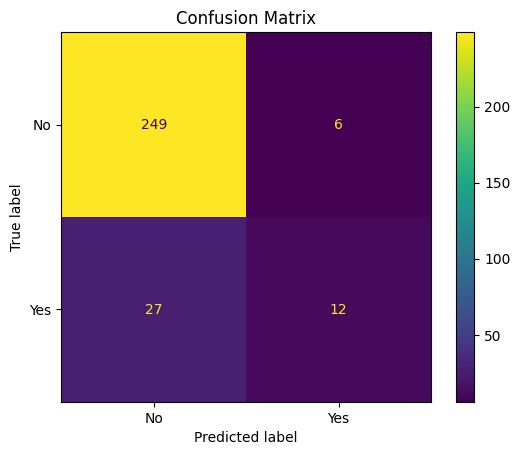

In [283]:
cm = confusion_matrix(y_test , lr_y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"]).plot()
plt.title("Confusion Matrix")
plt.show()

In [228]:
report = classification_report(y_test, y_pred, target_names=["No","Yes"],output_dict=True)
report

{'No': {'precision': 0.8723404255319149,
  'recall': 0.9919354838709677,
  'f1-score': 0.9283018867924528,
  'support': 124.0},
 'Yes': {'precision': 0.8333333333333334,
  'recall': 0.21739130434782608,
  'f1-score': 0.3448275862068966,
  'support': 23.0},
 'accuracy': 0.8707482993197279,
 'macro avg': {'precision': 0.8528368794326242,
  'recall': 0.604663394109397,
  'f1-score': 0.6365647364996747,
  'support': 147.0},
 'weighted avg': {'precision': 0.8662372750518648,
  'recall': 0.8707482993197279,
  'f1-score': 0.8370099894219236,
  'support': 147.0}}

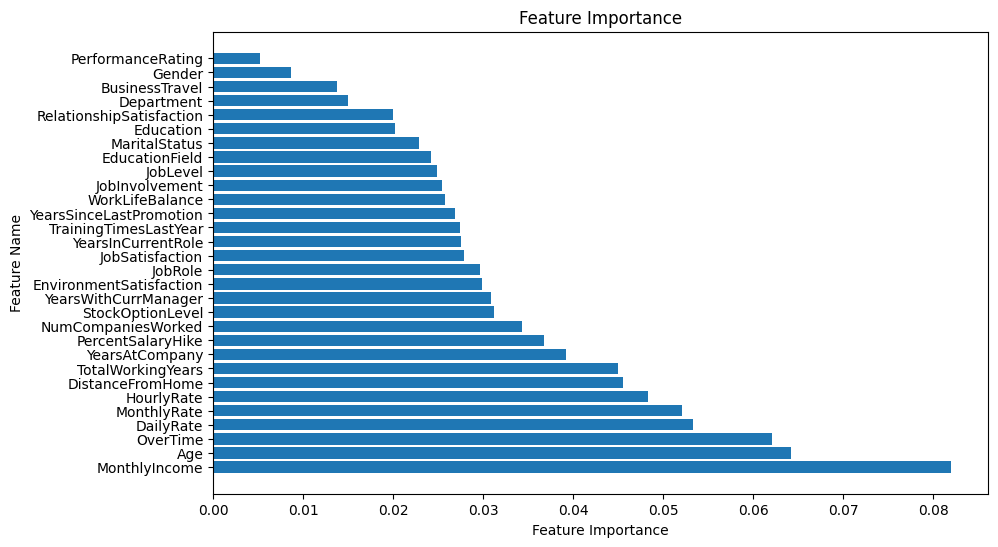

In [229]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [233]:
class_report = pd.DataFrame(report)
class_report

No        Yes  accuracy   macro avg  weighted avg
precision    0.872340   0.833333  0.870748    0.852837      0.866237
recall       0.991935   0.217391  0.870748    0.604663      0.870748
f1-score     0.928302   0.344828  0.870748    0.636565      0.837010
support    124.000000  23.000000  0.870748  147.000000    147.000000